In [42]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from pes import ammonia_pes_

/var/folders/hf/60jhbx_s40b92cvfxl5gbbb80000gn/T/ipykernel_2332/2701652026.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  inversion_pot(-0.6, 0.6).show()


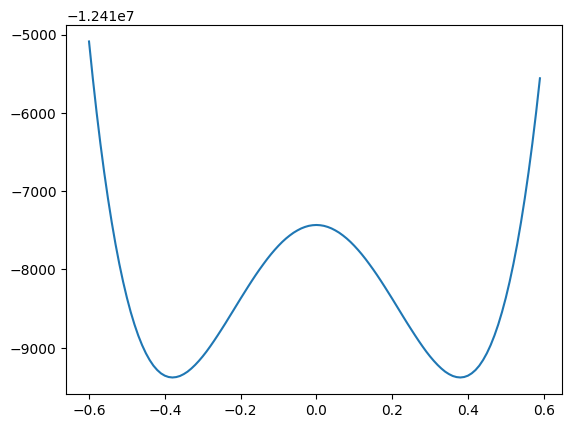

In [43]:
def inversion_pot(start, end, step=0.01):
    x = jnp.arange(start, end, step)
    r = 1.0102908
    theta = jnp.asin(x / r)
    alpha = 2 * jnp.asin(jnp.sqrt(3) * jnp.cos(theta) / 2)
    energy = [ammonia_pes_(r, r, r, a, a, a) for a in alpha]
    fig, ax = plt.subplots()
    ax.plot(x, energy)
    return fig
inversion_pot(-0.6, 0.6).show()

In [52]:
r = 1.0102908
a = 107.33 * jnp.pi / 180
ammonia_pes_(r, r, r, a, a, a) - ammonia_pes_(-r, -r, -r, a, a, a)

Array(-9.395775e+10, dtype=float32, weak_type=True)

In [96]:
def transition_state_ortho():
    r = 1.0102908
    h1 = jnp.array([0.0, 1.0]) * r
    h2 = jnp.array([jnp.sqrt(3)/2, -1/2]) * r
    h3 = jnp.array([-jnp.sqrt(3)/2, -1/2]) * r
    angle = lambda x, y: jnp.acos(jnp.dot(x, y) / jnp.sqrt(jnp.linalg.norm(x)*jnp.linalg.norm(y)))
    bond_ang = lambda pos: [angle(pos-h2, pos-h3), angle(pos-h1, pos-h3), angle(pos-h1, pos-h2)]
    bond_len = lambda pos: jnp.linalg.norm(jnp.array([h1, h2, h3]) - pos, axis=1)
    bond = lambda pos: [*bond_len(pos), *bond_ang(pos)]
    x_list = jnp.arange(-r/2, r/2, 0.01)
    y_list = jnp.arange(-r/2, r/2, 0.01)
    energy = jnp.array([[ammonia_pes_(*bond(jnp.array([x, y]))) for y in y_list] for x in x_list])
    return x_list, y_list, energy
    # fig, ax = plt.subplots()
    # ax.imshow(energy)
    # return fig
# transition_state_ortho().show()
x, y, e = transition_state_ortho()

In [ ]:
def transition_state_ortho_():
    r = 1.0102908
    phi_list = jnp.arange(-jnp.pi/6, jnp.pi/6, 0.01)
    psi_list = jnp.arange(-jnp.pi/6, jnp.pi/6, 0.01)
    energy = jnp.array([[ammonia_pes_(r, r, r, 2*jnp.pi/3 + phi, 2*jnp.pi/3 + psi, 2*jnp.pi/3 - phi - psi) for psi in psi_list] for phi in phi_list])
    return phi_list, psi_list, energy

In [97]:
# len(x)
ee = jnp.log(e - jnp.min(e))
e

Array([[-12384685., -12385754., -12386808., ..., -12383925., -12381703.,
        -12379386.],
       [-12385241., -12386288., -12387320., ..., -12382043., -12379693.,
        -12377239.],
       [-12385769., -12386792., -12387804., ..., -12380071., -12377587.,
        -12374990.],
       ...,
       [-12389110., -12389825., -12390542., ..., -12382352., -12379918.,
        -12377370.],
       [-12388706., -12389423., -12390144., ..., -12384262., -12381960.,
        -12379552.],
       [-12388281., -12389002., -12389727., ..., -12386079., -12383904.,
        -12381630.]], dtype=float32)

/var/folders/hf/60jhbx_s40b92cvfxl5gbbb80000gn/T/ipykernel_2332/3131322451.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


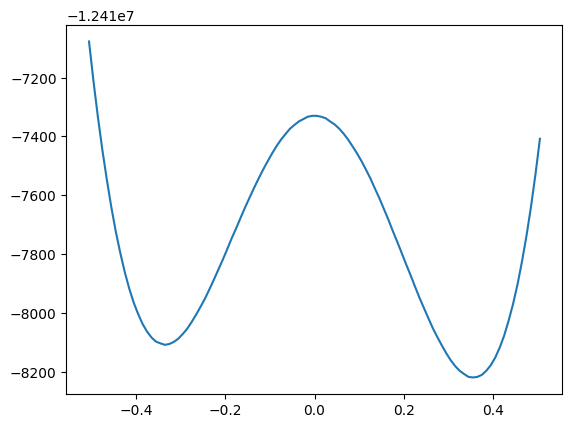

In [101]:
fig, ax = plt.subplots()
ax.plot(x, e[:, len(y)//2])
# ax.plot(y, e[len(x)//2, :])
fig.show()

/var/folders/hf/60jhbx_s40b92cvfxl5gbbb80000gn/T/ipykernel_2332/1682352150.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  sfig.show()


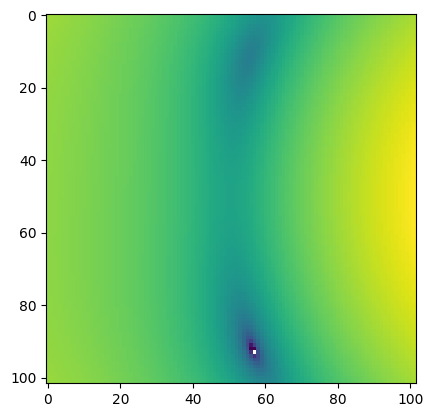

In [90]:
sfig, sax = plt.subplots()
sax.imshow(ee)
sfig.show()

/var/folders/hf/60jhbx_s40b92cvfxl5gbbb80000gn/T/ipykernel_2332/3152817802.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  sym_poly_plot(0.6).show()


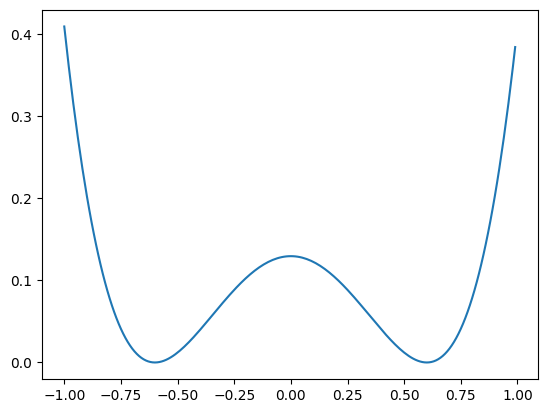

In [109]:
def polynomial_plot(a1, a2):
    x = jnp.arange(-1.0, 1.0, 0.01)
    y = (x - a1)**2 * (x - a2)**2
    fig, ax = plt.subplots()
    ax.plot(x, y)
    return fig
sym_poly_plot = lambda a: polynomial_plot(-a, a)
sym_poly_plot(0.6).show()